#### __Bài tập 2:__ Sử dụng FFT để tăng mẫu một ảnh: trước tiên tăng gấp đôi kích thước của ảnh xám Lena bằng cách thêm các hàng/cột có giá trị 0 vào các vị trí xen kẽ, sau đó sử dụng FFT, tiếp theo là bộ lọc thông thấp (LPF), và cuối cùng là IFFT để tạo ra ảnh đầu ra. Tại sao phương pháp này lại hiệu quả?

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [ ]:
# numpy để xử lý mảng
import numpy as np               
# numpy.fft để thực hiện các phép biến đổi Fourier   
import numpy.fft as fp             
# matplotlib.pyplot để vẽ đồ thị và hiển thị ảnh 
import matplotlib.pyplot as plt     
# skimage.io để đọc và ghi ảnh
import skimage.io                   

#### 2. Đọc ảnh và chuẩn bị ảnh

In [ ]:
# Đọc ảnh lena.jpg và chuyển đổi ảnh sang grayscale bằng cách lấy trung bình các kênh màu
im = np.mean(skimage.io.imread('../images/lena.jpg'), axis=2)  
# Tạo một ảnh mới im1 có kích thước gấp đôi kích thước của ảnh gốc 
im1 = np.zeros((2*im.shape[0], 2*im.shape[1]))                  
print(im.shape, im1.shape)
# Sao chép các giá trị từ ảnh gốc im vào các vị trí tương ứng trong ảnh im1                                      
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im1[2*i,2*j] = im[i,j]

(220, 220) (440, 440)


#### 3. Định nghĩa hàm để thêm padding bằng các giá trị 0

In [4]:
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

#### 4. Tạo kernel của bộ lọc thông thấp (LPF) và thêm padding

In [ ]:
kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]
kernel = np.pad(kernel, (((im1.shape[0]-3)//2,(im1.shape[0]-3)//2+1), ((im1.shape[1]-3)//2,(im1.shape[1]-3)//2+1)), padwithzeros)

In [ ]:
plt.figure(figsize=(15,10))
plt.gray()

<Figure size 3000x2000 with 0 Axes>

#### 5. Thực hiện biến đổi Fourier và áp dụng bộ lọc

In [ ]:
# Tính biến đổi Fourier của ảnh im1
freq = fp.fft2(im1)                        
# Tính biến đổi Fourier của kernel sau khi dịch chuyển     
freq_kernel = fp.fft2(fp.ifftshift(kernel))     
# Nhân phổ của ảnh với phổ của kernel để áp dụng bộ lọc thông thấp
freq_LPF = freq*freq_kernel                     
# Tính biến đổi ngược Fourier để thu được ảnh đã lọc
im2 = fp.ifft2(freq_LPF)                        
# Tính biến đổi Fourier của ảnh đã lọc
freq_im2 = fp.fft2(im2)                         

#### 6. Hiển thị và lưu kết quả

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21020\1935153876.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21020\1935153876.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21020\1935153876.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21020\1935153876.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(im2.astype(np.uint8))


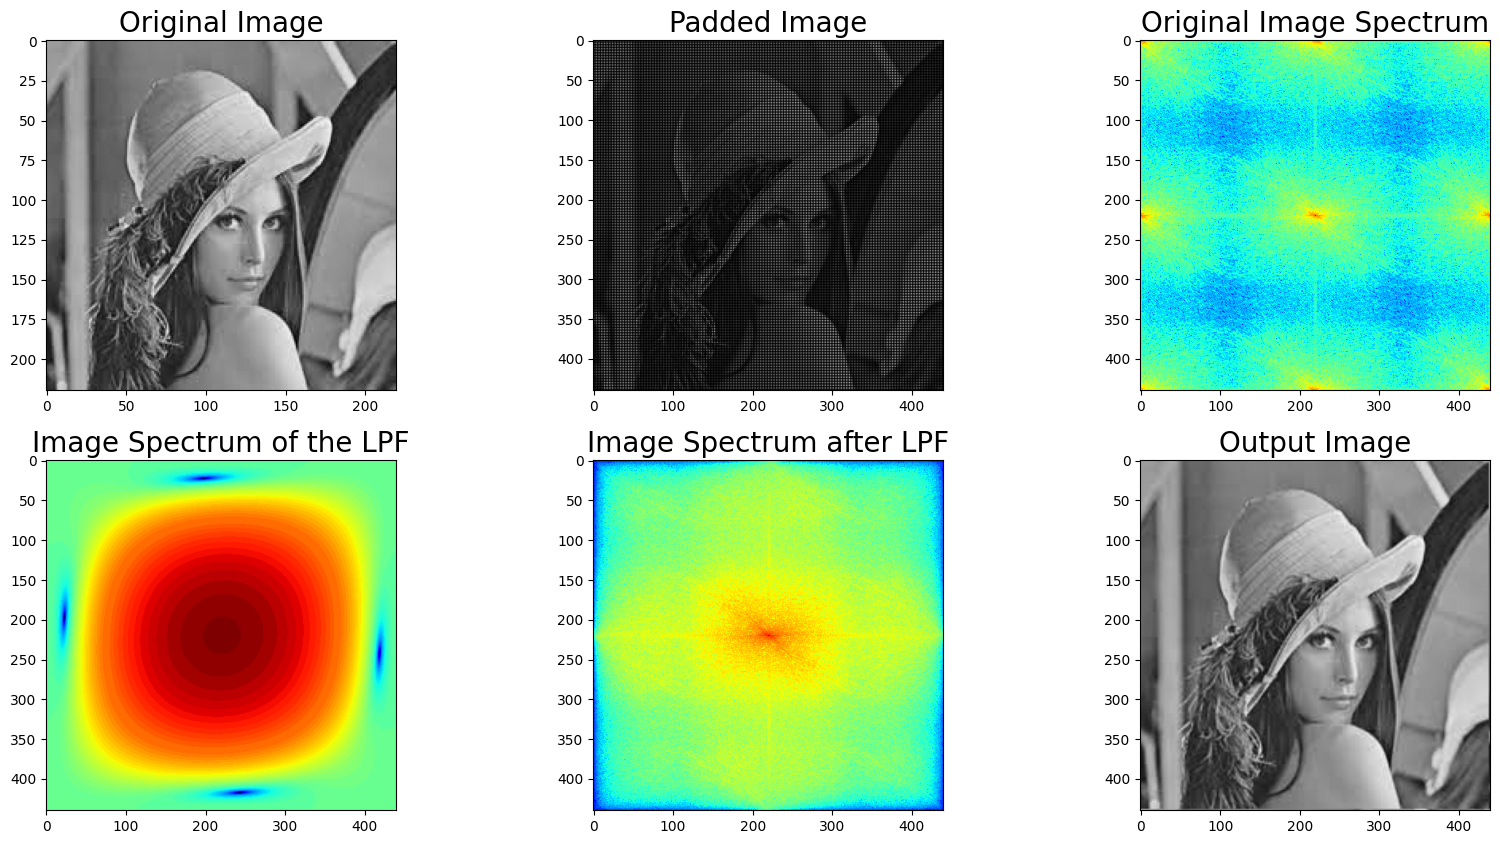

In [ ]:
# Tạo một hình ảnh với kích thước 20x10 inch
plt.figure(figsize=(20, 10))                            
# Hiển thị ảnh gốc, ảnh đã thêm padding, phổ của ảnh gốc, phổ của kernel, phổ của ảnh sau khi lọc và ảnh đầu ra
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=20)
plt.subplot(2,3,2)
plt.imshow(im1)
plt.title('Padded Image', size=20)
plt.subplot(2,3,3)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
plt.title('Original Image Spectrum', size=20)
plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
plt.title('Image Spectrum of the LPF', size=20)
plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
plt.title('Image Spectrum after LPF', size=20)
plt.subplot(2,3,6)
plt.imshow(im2.astype(np.uint8))
plt.title('Output Image', size=20)
plt.savefig('output_image.png', bbox_inches='tight')    # Lưu hình ảnh kết quả thành file output_image.png
plt.show()                                              # Hiển thị hình ảnh

#### Phương pháp này hiệu quả vì nó tận dụng các đặc tính của Biến đổi Fourier để xử lý ảnh trong miền tần số, nơi mà các thành phần tần số cao và thấp có thể được xử lý riêng biệt. Việc áp dụng bộ lọc thông thấp giúp làm mượt ảnh và giảm thiểu hiện tượng aliasing, tạo ra một ảnh đầu ra mượt mà hơn.